<a href="https://colab.research.google.com/github/ShahnilZulkarnain/SunSpot_Prediction/blob/main/Sunspots_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/LSTM /Monthly sunspot.xlsx")

In [ ]:
df1 = df[["Year_frac", "Sunspots"]]

<function matplotlib.pyplot.show(close=None, block=None)>

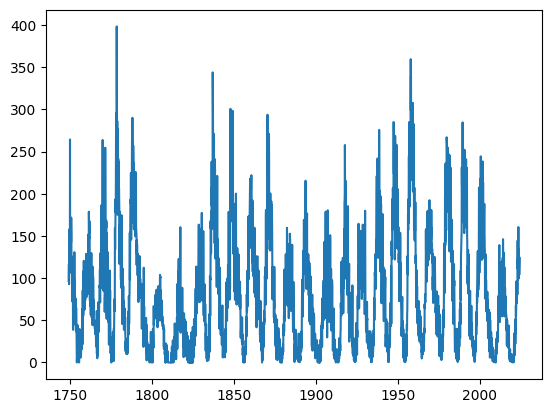

In [ ]:
plt.plot(df1['Year_frac'], df1['Sunspots'])
plt.show

In [ ]:
df1['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(day=1))

<ipython-input-5-faa53b46ff94>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(day=1))


In [ ]:
df2 = df1[['Date', 'Sunspots']]
df2.head()

,Date,Sunspots
0,1749-01-01,96.7
1,1749-02-01,104.3
2,1749-03-01,116.7
3,1749-04-01,92.8
4,1749-05-01,141.7


In [ ]:
df2 = pd.DataFrame(df2)
df2.set_index('Date',inplace = True)

#Test train split

In [ ]:
train = df2[:3171]
test = df2[3171:]

In [ ]:
train

,Sunspots
Date,
1749-01-01,96.7
1749-02-01,104.3
1749-03-01,116.7
1749-04-01,92.8
1749-05-01,141.7
...,...
2012-11-01,87.6
2012-12-01,56.8
2013-01-01,96.1


#Scaling Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
scaler.fit(train)
scaler_train = scaler.transform(train)
scaler_test = scaler.transform(test)

In [ ]:
scaler_train.shape

(3171, 1)

#Time series generator

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
#defining Generator
n_input = 11*12 #number of data taken as input
output_length = 12
n_features = 1 # number of features
batch = 1 #number of batch
generator = TimeseriesGenerator(scaler_train, scaler_train, length = n_input,
                                batch_size = batch, sampling_rate = 1, stride = output_length, start_index = 0,
                                end_index = None)

In [ ]:
#see the first outpput
x,y = generator[0]
print(x)
print(y)

[[[0.24284279]
  [0.26192868]
  [0.29306881]
  [0.23304872]
  [0.35585133]
  [0.34957308]
  [0.39678553]
  [0.27749874]
  [0.31767956]
  [0.31592165]
  [0.66373682]
  [0.35660472]
  [0.30688096]
  [0.31767956]
  [0.37343044]
  [0.36966349]
  [0.37669513]
  [0.41863385]
  [0.35735811]
  [0.43119036]
  [0.38171773]
  [0.27498744]
  [0.26494224]
  [0.31567052]
  [0.29306881]
  [0.18206931]
  [0.18960321]
  [0.23606228]
  [0.25414365]
  [0.21220492]
  [0.27749874]
  [0.2503767 ]
  [0.09844299]
  [0.09718734]
  [0.11928679]
  [0.18407835]
  [0.14640884]
  [0.20919136]
  [0.29708689]
  [0.24811652]
  [0.24987443]
  [0.16574586]
  [0.32822702]
  [0.12255148]
  [0.1135108 ]
  [0.19512808]
  [0.15745856]
  [0.16750377]
  [0.18407835]
  [0.13385234]
  [0.19136113]
  [0.15896534]
  [0.15067805]
  [0.13259669]
  [0.09216474]
  [0.16323456]
  [0.11727775]
  [0.10472125]
  [0.08362632]
  [0.02812657]
  [0.        ]
  [0.0125565 ]
  [0.00703164]
  [0.05725766]
  [0.08663988]
  [0.11175289]
  [0.07860

In [ ]:
x.shape

(1, 132, 1)

In [ ]:
y.shape

(1, 1)

#Creating lstm Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM


In [ ]:
#defining Model

model = Sequential()
model.add(LSTM(132, activation = 'relu',return_sequences = True, input_shape = (n_input,scaler_train.shape[1])))
model.add(LSTM(132, activation = 'relu',return_sequences = False))
model.add(Dense(30, activation ='relu'))
model.add(Dense(1, activation = 'relu'))
model.compile(optimizer= 'adam', loss= 'mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 132, 132)          70752     
                                                                 
 lstm_1 (LSTM)               (None, 132)               139920    
                                                                 
 dense (Dense)               (None, 30)                3990      
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 214693 (838.64 KB)
Trainable params: 214693 (838.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(generator, epochs =10)

Epoch 1/10
254/254 [==============================] - 70s 250ms/step - loss: 0.0179
Epoch 2/10
254/254 [==============================] - 57s 225ms/step - loss: 0.0077
Epoch 3/10
254/254 [==============================] - 53s 210ms/step - loss: 0.0068
Epoch 4/10
254/254 [==============================] - 56s 219ms/step - loss: 0.0064
Epoch 5/10
254/254 [==============================] - 53s 209ms/step - loss: 0.0060
Epoch 6/10
254/254 [==============================] - 56s 220ms/step - loss: 0.0058
Epoch 7/10
254/254 [==============================] - 53s 208ms/step - loss: 0.0061
Epoch 8/10
254/254 [==============================] - 51s 202ms/step - loss: 0.0054
Epoch 9/10
254/254 [==============================] - 55s 214ms/step - loss: 0.0054
Epoch 10/10
254/254 [==============================] - 63s 247ms/step - loss: 0.0056


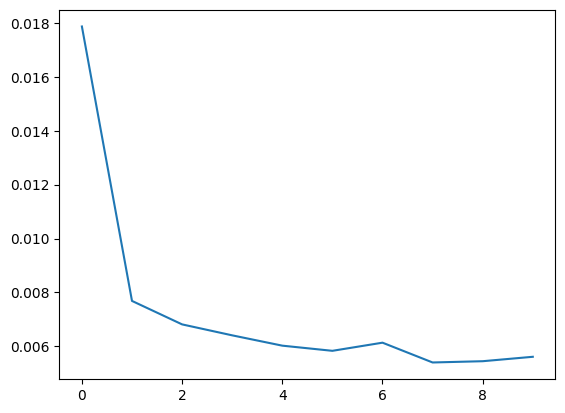

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot (range(len(loss_per_epoch)), loss_per_epoch)

#Test Prediction

In [ ]:
test_generator1 =[]
test_generator1 = TimeseriesGenerator(scaler_train, scaler_train, length = n_input,
                                batch_size = batch, sampling_rate = 1, stride = output_length, start_index = 0,
                                end_index = None)

In [ ]:
'''test_generator = []
test_generator = TimeseriesGenerator( data = scaler_test,
                                     targets = scaler_test,
                                      length = n_input, batch_size = 1,
                                      sampling_rate= 1,
                                      stride = output_length , shuffle = False)'''

ValueError: `start_index+length=132 > end_index=131` is disallowed, as no part of the sequence would be left to be used as current step.

In [ ]:
scaler_test.shape

(132, 1)

#Predict training Data

In [ ]:
model.evaluate_generator(generator)

<ipython-input-27-709134d88b80>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(generator)


0.004546945448964834

In [ ]:
train_predict = model.predict_generator(scaler_train)

<ipython-input-28-a9f591efb2dd>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  train_predict = model.predict_generator(scaler_train)


In [ ]:
train_predict.shape

(3171, 1)

In [ ]:
true_train_predict = scaler.inverse_transform(train_predict)
train['predictions'] = true_train_predict

<ipython-input-30-98d361b2b74a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['predictions'] = true_train_predict


In [ ]:
train

,Sunspots,predictions
Date,,
1749-01-01,96.7,53.617462
1749-02-01,104.3,55.786266
1749-03-01,116.7,59.303734
1749-04-01,92.8,52.486046
1749-05-01,141.7,66.406570
...,...,...
2012-11-01,87.6,50.977718
2012-12-01,56.8,41.934563
2013-01-01,96.1,53.443428


<Axes: xlabel='Date'>

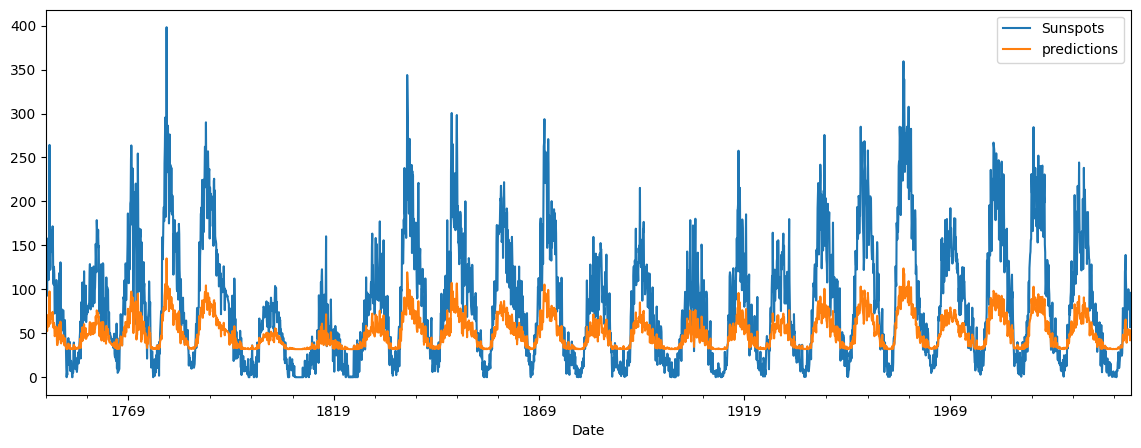

In [ ]:
train.plot(figsize =(14,5))

#Predict Test data

In [ ]:
'''test_generator2 = TimeseriesGenerator(data = scaler_train, target = np.zeros(scaler_test.shape), length = n_input,
                                batch_size = batch, sampling_rate = 1, stride = output_length, start_index = 0,
                                end_index = None)'''

'test_generator2 = TimeseriesGenerator(data = scaler_train, target = np.zeros(scaler_test.shape), length = n_input,\n                                batch_size = batch, sampling_rate = 1, stride = output_length, start_index = 0,\n                                end_index = None)'

In [ ]:
test_predict = model.predict_generator(scaler_test)

<ipython-input-34-35d5d79b569e>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_predict = model.predict_generator(scaler_test)


In [ ]:
test_predict.shape

(132, 1)

In [ ]:
true_test_predict = scaler.inverse_transform(test_predict)
test['predictions'] = true_test_predict

<ipython-input-36-322047d45881>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = true_test_predict


In [ ]:
test

,Sunspots,predictions
Date,,
2013-04-01,107.3,56.648952
2013-05-01,120.2,60.260674
2013-06-01,76.7,47.859192
2013-07-01,86.2,50.576416
2013-08-01,91.8,52.195023
...,...,...
2023-11-01,107.1,56.591366
2023-12-01,113.5,58.417759
2024-01-01,123.0,61.037670


<Axes: xlabel='Date'>

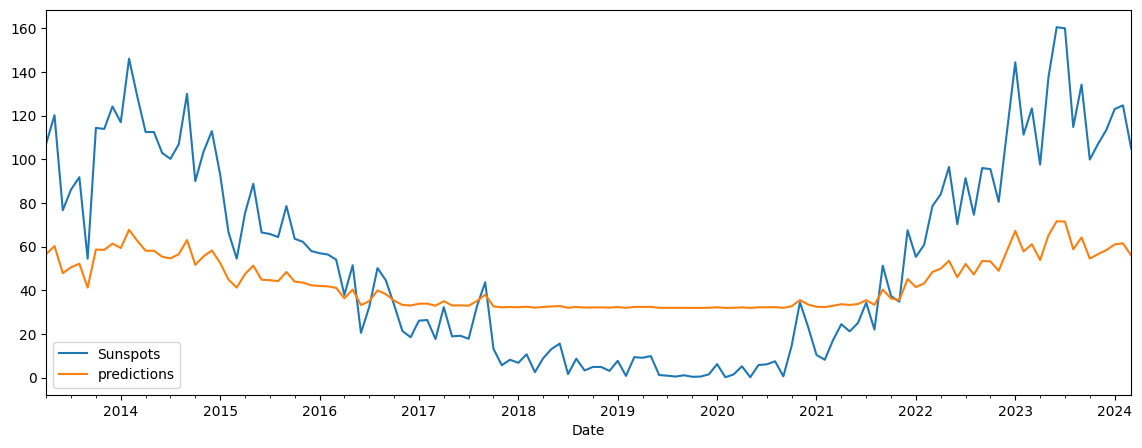

In [ ]:
test.plot(figsize =(14,5))

#predicting beyond the data set

In [ ]:
last_test_batch = scaler_test[-n_input:]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 132, 132)          70752     
                                                                 
 lstm_1 (LSTM)               (None, 132)               139920    
                                                                 
 dense (Dense)               (None, 30)                3990      
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 214693 (838.64 KB)
Trainable params: 214693 (838.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
last_test_batch.shape

(132, 1)

In [ ]:
scaler_test.shape

(132, 1)

In [ ]:
next_value = model.predict(scaler_test)

5/5 [==============================] - 0s 5ms/step


In [ ]:
last_test_batch


array([[0.26946258],
       [0.30185836],
       [0.19261678],
       [0.21647413],
       [0.23053742],
       [0.1368659 ],
       [0.28729282],
       [0.28603717],
       [0.31190357],
       [0.2938222 ],
       [0.36690105],
       [0.32320442],
       [0.28252135],
       [0.28252135],
       [0.25841286],
       [0.25163235],
       [0.26845806],
       [0.32646911],
       [0.22601708],
       [0.26017077],
       [0.28352587],
       [0.23355098],
       [0.16750377],
       [0.1368659 ],
       [0.18910095],
       [0.22300352],
       [0.16700151],
       [0.1652436 ],
       [0.16172777],
       [0.19738825],
       [0.15971873],
       [0.15620291],
       [0.14565545],
       [0.14314415],
       [0.14163737],
       [0.13586138],
       [0.0951783 ],
       [0.12933199],
       [0.05148167],
       [0.08136615],
       [0.1260673 ],
       [0.11200402],
       [0.08387745],
       [0.05374184],
       [0.04645907],
       [0.06554495],
       [0.06629834],
       [0.044

In [ ]:
next_value.shape


(132, 1)

In [ ]:
model.predict_generator(last_test_batch)

<ipython-input-46-0e0d99d73a47>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  model.predict_generator(last_test_batch)


array([[0.14226256],
       [0.15133268],
       [0.12018883],
       [0.1270126 ],
       [0.13107741],
       [0.103581  ],
       [0.1473296 ],
       [0.14698225],
       [0.15412751],
       [0.14913845],
       [0.17001496],
       [0.1573323 ],
       [0.14599887],
       [0.14599887],
       [0.13909048],
       [0.13717274],
       [0.14197335],
       [0.1582621 ],
       [0.12976377],
       [0.13959312],
       [0.14628106],
       [0.13195452],
       [0.11279173],
       [0.103581  ],
       [0.11917539],
       [0.12888913],
       [0.11263913],
       [0.11210522],
       [0.11104535],
       [0.12153503],
       [0.1104397 ],
       [0.10938067],
       [0.10620999],
       [0.10545957],
       [0.10501035],
       [0.1032843 ],
       [0.09134427],
       [0.10132417],
       [0.08343294],
       [0.08800904],
       [0.10033713],
       [0.09611292],
       [0.08854687],
       [0.08365815],
       [0.08294714],
       [0.08503059],
       [0.0851455 ],
       [0.082

In [ ]:
forcast_values= []
input_data = last_test_batch
next_value = model.predict_generator(input_data)
forcast_values.append(next_value[0,0])
last_test_batch = np.append(last_test_batch[132:], next_value, axis =0)

<ipython-input-47-7271a2182330>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  next_value = model.predict_generator(input_data)


In [ ]:
last_test_batch.shape

(132, 1)

In [ ]:
last_test_batch = scaler_test[-n_input:]
forcast_values= []

for i in range (30):
  #reshape the last value to match the input shape of the model
  input_data = last_test_batch
  #predict next value using the model
  next_value = model.predict_generator(input_data)
  #append the predicted values in the forcast data
  forcast_values.append(next_value[0,0])

  #update inputdata for the next prediction
  last_test_batch = np.append(last_test_batch[1:-132], next_value, axis =0)


<ipython-input-49-7f4de79184b0>:8: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  next_value = model.predict_generator(input_data)


In [ ]:
forcast_values

[0.14226256,
 0.105197586,
 0.09408797,
 0.09106547,
 0.09029445,
 0.09009786,
 0.09004775,
 0.09003496,
 0.090031706,
 0.09003088,
 0.09003067,
 0.09003062,
 0.090030596,
 0.090030596,
 0.090030596,
 0.090030596,
 0.090030596,
 0.090030596,
 0.090030596,
 0.090030596,
 0.090030596,
 0.090030596,
 0.090030596,
 0.090030596,
 0.090030596,
 0.090030596,
 0.090030596,
 0.090030596,
 0.090030596,
 0.090030596]

In [ ]:
test1 = test.copy()

In [ ]:
test1

,Sunspots,predictions
Date,,
2013-04-01,107.3,56.648952
2013-05-01,120.2,60.260674
2013-06-01,76.7,47.859192
2013-07-01,86.2,50.576416
2013-08-01,91.8,52.195023
...,...,...
2023-11-01,107.1,56.591366
2023-12-01,113.5,58.417759
2024-01-01,123.0,61.037670


In [ ]:
forcast_values= np.array(forcast_values).reshape(-1,1)

In [ ]:
true_forcast = scaler.inverse_transform(forcast_values)

In [ ]:
test1 = pd.concat([test1.iloc[:132],
pd.DataFrame(true_forcast, columns = ['predictions']),
test.iloc[132:]]).reset_index(drop =True)

In [ ]:
test1

,Sunspots,predictions
0,107.3,56.648952
1,120.2,60.260674
2,76.7,47.859192
3,86.2,50.576416
4,91.8,52.195023
...,...,...
157,NaN,35.850182
158,NaN,35.850182
159,NaN,35.850182
160,NaN,35.850182


<Axes: >

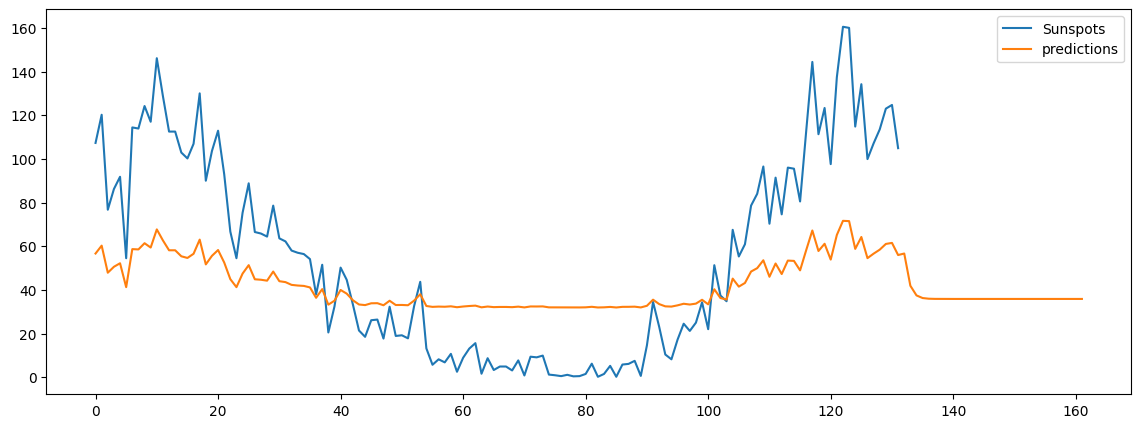

In [ ]:
test1.plot(figsize =(14,5))